# Tarea 5

NOTA
Los ejercicios de este notebook componen la Tarea5, para la que las fechas relevantes son:
Envío del PR inicial: lunes 17 de octubre
Aceptación del PR: lunes 31 de octubre

# Exponente(s) de Lyapunov

Una manera de caracterizar el caos en el sentido de *sensibilidad a condiciones iniciales* es a través de los exponentes de Liapunov. La idea es sencilla: si hay una separación *exponencial* de condiciones iniciales muy cercanas, entonces diremos que hay caos.

Por esto, simplemente monitoreamos la evolución de dos condiciones iniciales cercanas, $x_0$ y $x_0+\epsilon$, donde $\epsilon>0$ y pequeño.

Considerando mapeos en una dimensión, la distancia entre los iterados $n$ es

\begin{equation}
D_n = \big|\, f^{n}(x_0+\epsilon)-f^{n}(x_0) \big|\,.
\end{equation}

ntonces, suponiendo que $d_n$ tiene una dependencia exponencial de $n$, para $n\to\infty$ y $\epsilon\to 0$, escribimos $d_n= \epsilon \exp(\lambda n)$, de donde obtenemos

\begin{equation}
\lambda(x_0) \equiv \lim_{n\to\infty} \lim_{\epsilon\to 0} 
\frac{1}{n}\log\Big| \frac{f^{n}(x_0+\epsilon)-f^{n}(x_0)}{\epsilon}\Big|.
\end{equation}

A $\lambda(x_0)$ se le llama exponente de Lyapunov. Si $\lambda(x_0)>0$ diremos que hay caos, mientras que si $\lambda(x_0)<0$ diremos que no lo hay.

Observaciones:

- El exponente de Liapunov, estrictamente hablando, depende de la condición inicial $x_0$.

- En la definición del exponente de Lyapunov se require la evaluación de **dos** límites, uno que involucra al tiempo ($n\to\infty$), y otro a la condición inicial ($\epsilon\to 0$).

- La definición del exponente de Lyapunov es sutil, ya que en muchas ocasiones *sabemos* que el rango de $f(x)$ y de $f^n(x)$ es acotado cuando $x$ está en cierto dominio, lo que entonces podría llevar erróneamente a concluir que $\lambda(x_0)=0$. (La sutileza está en que el órden de los límites no conmuta.)

-

Si el mapeo $f(x)$ es suficientemente suave, entonces podemos escribir

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n}\log\Big| \frac{{\rm d} f^{n}}{{\rm d}x}(x_0)\Big|,
\end{equation}

Usando que

\begin{equation}
\frac{{\rm d}f^n}{{\rm d}x}(x_0) = f'(x_0) f'(x_1)\dots f'(x_{n-1}) 
= \prod_{i=1}^{n} f'(x_i), 
\end{equation}

donde $x_i=f^i(x_0)$
obtenemos

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n} \sum_{i=1}^n \log
\Big| \, f'(x_i)\, \Big|.
\end{equation}

In [1]:
#Pkg.add("Roots")
#Pkg.add("TaylorSeries")

In [2]:
#Pkg.update()

In [3]:
using PyPlot

# por conflictos entre paqueterías, se presentan primero los ejercicios 2 y 5.

## Ejercicio 2:
Rehacer los cálculos de los exponentes de Feigenbaum, \begin{eqnarray*} fn &=& \frac{C_n-C{n+1}}{C{n+1}-C{n+2}},\ an &=& \frac{d_n}{d{n+1}}, \end{eqnarray*}
usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la Tarea4.)

In [4]:
using TaylorSeries

In [5]:
Qc_p1(x,c) = x^2 + c
Qc_p1(x, args...) = !c(x, args[1])

Qc_p1 (generic function with 2 methods)

In [6]:
#Se utiliza la función del notebook para calcular la n-ésima iteración.
function Qc_n(x, args)
    c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc_p1(x,c)
    for it = 1:n
        x = Qc_p1(x,c)
    end
    return x
end

Qc_n (generic function with 1 method)

In [7]:
#Se utiliza la función vista en el notebook para calcular las raices por el métod de Newton.
function roots_newton(f, x0)
    t = Taylor1(1)
    for ind = 1:30
       fT = f(x0+t)
       x0 = x0 - fT.coeffs[1]/fT.coeffs[2]
    end
    x0
end

roots_newton (generic function with 1 method)

Se calculan las $C_n$'s correspondientes a las iteraciones $2^n$ de 'Qc'. 

In [8]:
Q1c = c -> Qc_n(0.0, (c, 1))
C0 = roots_newton(Q1c, -1.4)

0.0

In [9]:
Q2c = c -> Qc_n(0.0, (c, 2))
C1 = roots_newton(Q2c, -1.0)

-1.0

In [10]:
Q4c = c -> Qc_n(0.0, (c, 4))
C2 = roots_newton(Q4c, -1.4)

-1.3107026413368328

In [11]:
Q8c = c -> Qc_n(0.0, (c, 8))
C3 = roots_newton(Q8c, -1.4)

-1.3815474844320617

In [12]:
Q16c = c -> Qc_n(0.0, (c, 16))
C4 = roots_newton(Q16c, -1.4)

-1.3969453597045607

In [13]:
Q32c = c -> Qc_n(0.0, (c, 32))
C5 = roots_newton(Q32c, -1.4)

-1.4002530812147829

In [14]:
cs=[C0,C1,C2,C3,C4,C5]

6-element Array{Float64,1}:
  0.0    
 -1.0    
 -1.3107 
 -1.38155
 -1.39695
 -1.40025

Se calculan las $f_{n}$.

In [15]:
function fn(c::Array)
    fn=Float64[]
    for i in 1:length(cs)-2
        x=(c[i]-c[i+1])/(c[i+1]-c[i+2])
        push!(fn,x)
    end
    fn
end

fn (generic function with 1 method)

In [16]:
fn(cs)

4-element Array{Float64,1}:
 3.21851
 4.38568
 4.60095
 4.65513

Vemos que los números $f_{n}$'s convergen al núemro de Feigenbaum $4.6692$

Se utilza la función de la tarea4 para calcular las $d_{n}$'s.

In [17]:
function d_n(a::Array)
    d=Float64[]
    for i in 2:length(a)
        y=minabs(deleteat!(iterandoando(x->Qc_p1(x,a[i]),0.0,(2^(i-1))-1),1))
        push!(d,y)
    end
    d
end

d_n (generic function with 1 method)

Iterémos n veces una función f cualquiera dada una condición inicial $x_{0}$.

In [18]:
function iterandoando(f::Function,x0::Float64,n::Int64)
    ev = Float64[x0]
    x=x0
    for i in 1:n
        x=f(x)
        push!(ev,x)
    end
    ev
end

iterandoando (generic function with 1 method)

In [19]:
d_n(cs)

5-element Array{Float64,1}:
 1.0      
 0.407239 
 0.163425 
 0.0653634
 0.0261213

Se utilza la función de la tarea4 para calcular las $a_{n}$'s

In [20]:
function suc2(a::Array)
    coc=Float64[]
    for i in 1:length(a)-1
        d=a[i]/a[i+1]
        push!(coc,d)
    end
    coc
end

suc2 (generic function with 1 method)

In [21]:
suc2(d_n(cs))

4-element Array{Float64,1}:
 2.45556
 2.49189
 2.50026
 2.50231

Se observa que la suseción converge a $2.5029$, el cual es la segunda constante de Feigenbaum.

**Ejercicio 5:**

- Usando el análisis gráfico para un valor de $c$ *ligeramente* anterior al punto donde se observa la ventana de periodo 3 para la familia $Q_c(x)$, y uno en la ventana de periodo 3, concluyan el tipo de bifurcación que se observa.

- Comparen la dinámica para ambos valores de $c$ del inciso anterior. ¿Cómo es el exponente de Liapunov en cada caso?

- Encuentren el valor de $c$ donde se da el ciclo superestable de periodo 3. (Nuevamente, ayuden al método de Newton con una buena semilla inicial para $c$.) Demuestren que para este valor de $c$ el mapeo $Q_c^3(x)$ tiene *ocho* puntos fijos, donde dos de ellos son puntos fijos de $Q_c(x)$, y los otros 6 forman dos secuencias periódicas, de periodo 3 en $Q_c(x)$, una de ellas estable y la otra inestable.

(Los siguientes incisos usan el valor de $c$ encontrado en el inciso anterior.)

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

(Los intervalos $I_0$ e $I_1$, y estas propiedades, son básicos en la demostración del teorema "periodo tres implica caos".)

# Solución

Se utilizan las funciones del notebook 8 para poder mostrar la dinámica del mapeo cuadrático en la ventana de periodo 3.

In [22]:
function ciclosestables!(xx, f, nit, nout, cc)
    @assert nit > 0 && nout > 0
    
    # Primeros nit iterados
    x0 = 0.0
    for it = 1:nit
        x0 = f(x0, cc)
    end
    
    # Se guardan los siguientes nout iterados
    for it = 1:nout
        x0 = f(x0, cc)
        @inbounds xx[it] = x0
    end
    
    nothing
end

ciclosestables! (generic function with 1 method)

In [23]:
function diagbifurc(f, nit, nout, crange)
    xx = Vector{Float64}(nout)
    ff = Array{Float64,2}(nout, length(crange))
    
    for ic in eachindex(crange)
        c = crange[ic]
        ciclosestables!(xx, f, nit, nout, c)
        ff[:,ic] = xx
    end
    
    return ff
end

diagbifurc (generic function with 1 method)

In [24]:
function Qc_ns(x, args)
    c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc_p1(x,c)
    for it = 1:n
        x = Qc_p1(x,c)
        @show x
    end
    return x
end

Qc_ns (generic function with 1 method)

Se mapea la dinámica en el rango de $C$ para la ventana de periodo 3 

In [25]:
crange_1 = -1.74:-1/2^13:-1.8

ff = diagbifurc(Qc_p1, 10000, 100, crange_1); 
cc = ones(size(ff)[1])*crange_1';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff)[1]*size(ff)[2]);
cc = reshape(cc, size(ff));

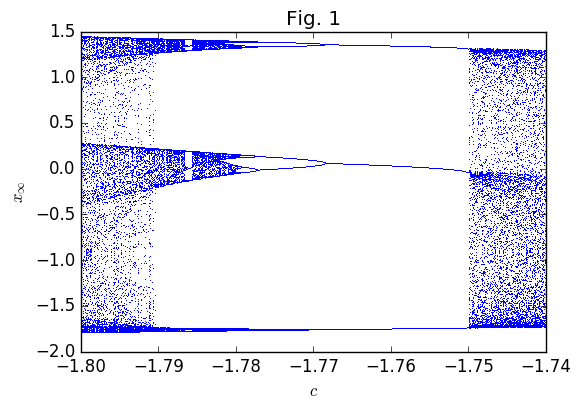

PyObject <matplotlib.text.Text object at 0x7fc82c3fb9b0>

In [26]:
figure(figsize=(6,4))
plot(cc, ff, "b,")
#plot([-1.2,-1.5,-1.5,-1.2,-1.2],[-1.5,-1.5,-0.9,-0.9,-1.5], "k-")
#plot([-2,0.5],[0.0,0.0], "r-")
xlabel(L"c")
ylabel(L"x_\infty")
title("Fig. 1")

Según la figura de arriba, $C_1=-1.765$ es un punto antes de la bifurcación y $C_2=-1.775$ es un punto dentro de la bifurcación.  

In [27]:
Qc_ns(0.0,(-1.765,10))

x = -1.765
x = 1.3502249999999998
x = 0.058107550624999504
x = -1.761623512560363
x = 1.3383174000055116
x = 0.026093463157512486
x = -1.7643191311804474
x = 1.3478219966493288
x = 0.05162413465178339
x = -1.7623349487214544


  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/pablorv/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /home/pablorv/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/pablorv/.julia/v0.5/PyCall/sr

-1.7623349487214544

In [28]:
Qc_ns(0.0,(-1.775,10))

x = -1.775
x = 1.3756249999999999
x = 0.11734414062499976
x = -1.7612303526609803
x = 1.3269323551343208
x = -0.014250524897684524
x = -1.7747969225401403
x = 1.374904116257953
x = 0.11536132890306261
x = -1.7616917637937193


-1.7616917637937193

Como se puede observar, las iteraciones de $Q_c$ en $C_1$ son de periodo tres y en $C_2$ son de periodo seis. 

A continuación se calculan los exponentes de Lyapunov en $C\in[-1.8,-1.74]$ utilizando la paquetería $Taylorseries$.

In [29]:
function exponentes_1(ev::Array,f::Function)
    n=length(ev)
    lambda=0
    t = Taylor1(1)
    for i in 1:n
        fT = f(ev[i]+t)
        sumando=abs(fT.coeffs[2])
        lambda=lambda + log(sumando)
    end
    lambda/n
end


exponentes_1 (generic function with 1 method)

In [30]:
function explyap(Qc::Function,x0::Float64,crange::FloatRange,n::Int64)
    evaluacion=Float64[]
    valordec=Float64[]
    for i in crange
        Qci(x)=Qc(x,i)
        ev=iterandoando(Qci,x0,n)
        lambda=exponentes_1(ev,Qci)
            if abs(lambda)<Inf
                push!(evaluacion,lambda)
            else
                push!(evaluacion,-10)       
          end
    end 
    for i in 1:length(evaluacion)
        push!(valordec,crange[i])
    end
    evaluacion,valordec
end

explyap (generic function with 1 method)

In [31]:
crange_2 = -1.74:-1/2^13:-1.8
func_1,c_1= explyap(Qc_p1,1.0,crange_2,10000)

([0.420117,0.426695,0.414884,0.426649,0.420359,0.430406,0.428387,0.427354,0.426715,0.434811  …  0.411835,0.409198,0.414093,0.410869,0.416821,0.41195,0.41224,0.413175,0.408489,0.411643],[-1.74,-1.74012,-1.74024,-1.74037,-1.74049,-1.74061,-1.74073,-1.74085,-1.74098,-1.7411  …  -1.79884,-1.79896,-1.79908,-1.7992,-1.79933,-1.79945,-1.79957,-1.79969,-1.79981,-1.79994])

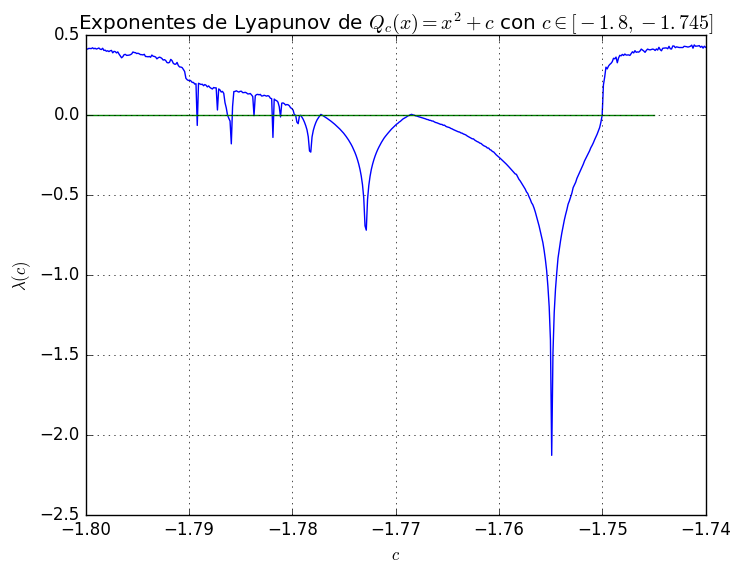

In [32]:
plot(c_1, func_1)
plot([-1.745,  -1.8], [0, 0])
#plot([-1.25,  -1.25], [1, -1])
xlabel(L"c")
ylabel(L"\lambda(c)")
grid(true)
title(L"Exponentes de Lyapunov de $Q_c(x)= x^2 +c$ con $c\in [ -1.8, -1.745]$")
ylim(-2.5,0.5)
show()

En la figura anterior se puede observar que para $C=-1.75$ y $C\approx-1.769$, los exponenetes de Lyapunov son cero, y en estos lugares se dan las bifurcaciones de periodo tres y seis respectivamente. Se puede notar también que después de cada bifrucación se tiene un mínimo que corresponde a los puntos súper estables. 

A continuación se calcula el punto súper estable de periodo tres.

In [33]:
Q3c = c -> Qc_n(0.0, (c, 3))
C3_1 = roots_newton(Q3c, -1.4)

-1.7548776662466927

$C=-1.7548776662466927$ es el punto súper estable de periodo tres. A continuación se presenta gráficamente que ...

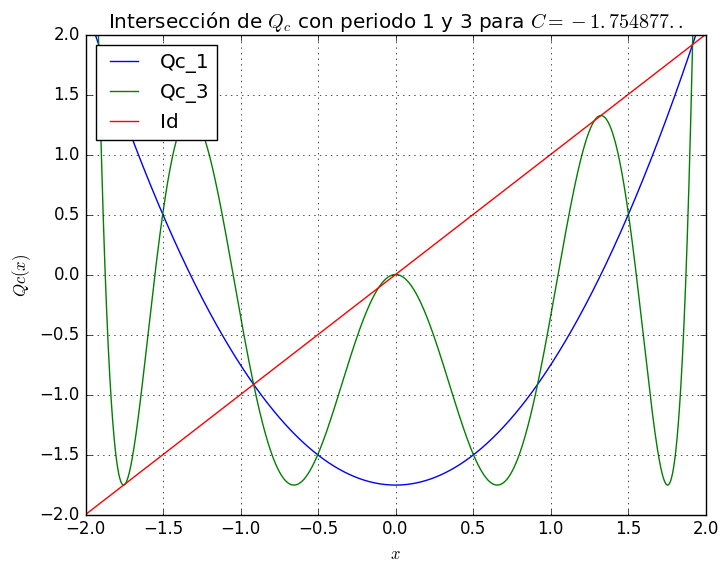

PyObject <matplotlib.legend.Legend object at 0x7fc8291905c0>

In [34]:
xrange =-3:0.0001:3
Qc_1(x)=Qc_n(x,(C3_1,1))
Qc_3(x)=Qc_n(x,(C3_1,3))
plot(xrange, [Qc_1(i) for i in xrange],  label="Qc_1")
plot(xrange, [Qc_3(i) for i in xrange],  label="Qc_3")
plot(xrange,xrange, label="Id")
ylim(-2.0,2)
xlim(-2,2)
xlabel(L"x")
ylabel(L"Qc(x)")
grid(true)
title(L"Intersección de $Q_c$ con periodo 1 y 3 para $C=-1.754877..$")
legend(loc="upper left") 

En la figura, a simple vista se pueden observar cinco intersecciones. Si se hace un sum en los intervalos: $x\in[-1.8,-1.7]$ y $x\in[-0.5,1.5]$ se observa lo siguiente. 

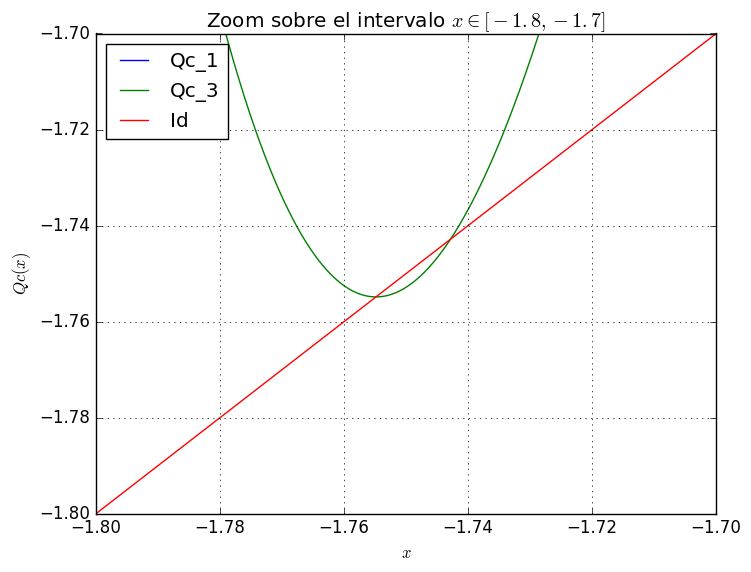

PyObject <matplotlib.legend.Legend object at 0x7fc82919a4e0>

In [35]:
plot(xrange, [Qc_1(i) for i in xrange],  label="Qc_1")
plot(xrange, [Qc_3(i) for i in xrange],  label="Qc_3")
plot(xrange,xrange, label="Id")
ylim(-1.8,-1.7)
xlim(-1.8,-1.7)
xlabel(L"x")
ylabel(L"Qc(x)")
grid(true)
title(L"Zoom sobre el intervalo $x\in[-1.8,-1.7]$")
legend(loc="upper left") 

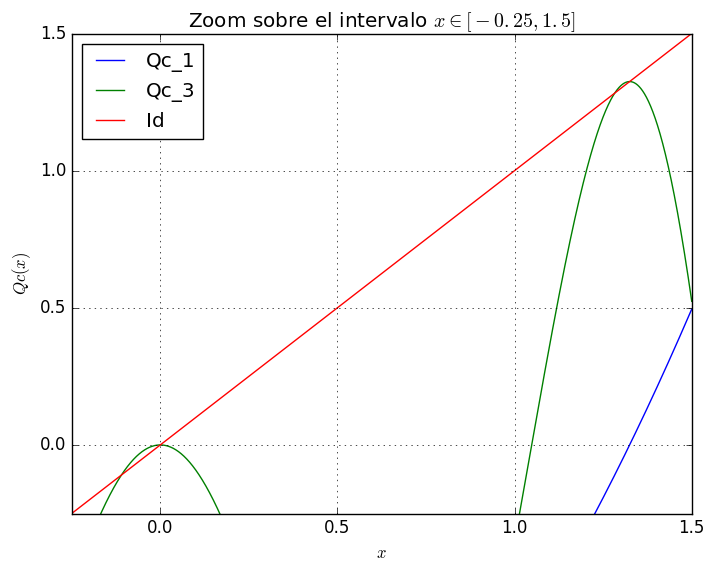

PyObject <matplotlib.legend.Legend object at 0x7fc828f7a6a0>

In [36]:
plot(xrange, [Qc_1(i) for i in xrange],  label="Qc_1")
plot(xrange, [Qc_3(i) for i in xrange],  label="Qc_3")
plot(xrange,xrange, label="Id")
ylim(-0.25,1.5)
xlim(-0.25,1.5)
xlabel(L"x")
ylabel(L"Qc(x)")
grid(true)
title(L"Zoom sobre el intervalo $x\in[-0.25,1.5]$")
legend(loc="upper left")

Las intersecciones en dichos intervalos se produce en dos lugares, por lo que el número total de puntos fijos para $Q_{c}^{3}$ es $8$. Seis pertenecen exclusivamente a $Q_{c}^{3}$, como lo muestran las dos figuras anteriores, y dos se comparten con $Q_{c}^{1}$. 

A continuación se calculan dichos puntos fijos.

In [37]:
fpq3(x)=Qc_3(x)-x
pQc3=Float64[]
condin=[-1.76,-1.74, -1.0, -0.125, 0.0, 1.3, 1.4, 2.0]
for i in condin
    p=roots_newton(fpq3,i)
    push!(pQc3,p)
end
pQc3

8-element Array{Float64,1}:
 -1.75488    
 -1.74285    
 -0.915937   
 -0.10965    
  2.22045e-16
  1.28266    
  1.32472    
  1.91594    

Los puntos fijos compartidos son $-0.915937$ y $1.91594$. Utilizando el criterio: $|Q_{c}^{3'}(x)|<1$ es estable, $|Q_{c}^{3'}(x)|>1$ es inestable, se analiza la estabilidad de los puntos fijos obtenidos.  

In [38]:
function estabilidad(a::Array,f)
    est=Float64[]
    t = Taylor1(1)
    for i in a
        fT = f(i+t)
        push!(est,abs(fT.coeffs[2]))
    end
    est
end
        

estabilidad (generic function with 1 method)

In [39]:
eQc3=estabilidad(pQc3,Qc_3)

8-element Array{Float64,1}:
  4.12953e-15
  1.96098    
  6.14733    
  1.96098    
  4.12953e-15
  1.96098    
  4.12953e-15
 56.2644     

| Punto fijo  |      $|Q_{c}^{3'}(x)|$    |  Criterio |
|----------|:-------------:|------:|
| -1.75488  | 4.12953e-15 | estable |
| -1.74285 |    1.96098    |  inestable |
| -0.915937  | 6.14733 |  inestable |
| -0.10965 | 1.96098 |  inestable |
| 2.22045e-16 | 4.12953e-15 |  estable |
| 1.28266  | 1.96098  |  inestable |
| 1.32472 | 4.12953e-15 |  estable |
| 1.91594 | 56.2644 |  inestable  |

A continuación se analiza la periodicidad del mapeo $Q_{c}^{3}$ con $C=-1.7548776662466927$ utilizando como condición inicial a un punto inestable y uno estable de la tabla anterior.

In [40]:
Qc_ns(pQc3[1],(C3_1,4))

x = 1.324717957244746
x = 2.220446049250313e-16
x = -1.7548776662466927
x = 1.324717957244746


1.324717957244746

In [41]:
Qc_ns(pQc3[2],(C3_1,4))

x = 1.2826642737997627
x = -0.10965002696442028
x = -1.7428545378333946
x = 1.2826642737997627


1.2826642737997627

Como se puede observar, las órbitas generadas por dichos puntos son de periodo tres y además cada uno de los elementos de la órbita es un punto estable, si la condición inicial es un punto estable, y cada uno de los elementos es un punto inestable si la condición inicial también lo es.  

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

In [42]:
ciclo_inestable=[pQc3[6],pQc3[4],pQc3[2]]

3-element Array{Float64,1}:
  1.28266
 -0.10965
 -1.74285

Para poder obtener una mejor aproximación se usarán números *bigFloat64*.

In [43]:
big(ciclo_inestable)

3-element Array{BigFloat,1}:
  1.282664273799762222338927131204400211572647094726562500000000000000000000000000    
 -1.096500269644213876318872280535288155078887939453125000000000000000000000000000e-01
 -1.742854537833394612533766121487133204936981201171875000000000000000000000000000    

In [44]:
[Qc_3(big(ciclo_inestable)[1]), Qc_3(big(ciclo_inestable)[2]), Qc_3(big(ciclo_inestable)[3])]

3-element Array{BigFloat,1}:
  1.28266427379976206217865073202293302481898616293826055790235820495485712249527     
 -1.096500269644218481996643815085429373924328923262859585592362271965426050080587e-01
 -1.742854537833394728129886857541156085920822765140827507206859294539633372729714    

In [45]:
[Qc_3(big(ciclo_inestable)[1]), Qc_3(big(ciclo_inestable)[2]), Qc_3(big(ciclo_inestable)[3])]-big(ciclo_inestable)

3-element Array{BigFloat,1}:
 -1.60160276399181467186753660931788301942097641795045142877504730347476539007862e-16 
 -4.605677771534550141218845440983809734585592362271965426050080586635159529038346e-16
 -1.155961207360540228809838415639689525072068592945396333727297135595260500102369e-16

Se puede onservar que al iterar los elementos de *big(ciclo_inestable)* se llega casi al mismo punto; por lo que $\hat\alpha\approx\alpha$, $\hat\beta\approx\beta$ y $\hat\gamma\approx\gamma$. Entonces los puntos que caen dentro de los intervalos deben de caer en un ciclo inestable.  

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

Se definen los intervalos

In [46]:
I0=[Qc_3(big(ciclo_inestable)[2]),big(ciclo_inestable)[1]]
I0_ord=sort(I0)

2-element Array{BigFloat,1}:
 -1.096500269644218481996643815085429373924328923262859585592362271965426050080587e-01
  1.282664273799762222338927131204400211572647094726562500000000000000000000000000    

In [47]:
I1=[big(ciclo_inestable)[3],big(ciclo_inestable)[2]]
I1_ord=sort(I1)

2-element Array{BigFloat,1}:
 -1.742854537833394612533766121487133204936981201171875000000000000000000000000000    
 -1.096500269644213876318872280535288155078887939453125000000000000000000000000000e-01

# i)

In [48]:
Qc_I0=[Qc_p1(Qc_3(big(ciclo_inestable)[2]),C3_1), Qc_p1(big(ciclo_inestable)[1],C3_1)]
Qc_I0_ord=sort(Qc_I0)

2-element Array{BigFloat,1}:
 -1.742854537833394286137401793348049573203339540370616742983106549802755360777166    
 -1.096500269644213359095655309072426266792346543205052288861547828829889894564076e-01

In [49]:
I1_ord[1] <= Qc_I0_ord[1]

true

In [50]:
I1_ord[2] <= Qc_I0_ord[2]

true

Vemos que el extremo izquierdo de $I1$ es mayor que el extremo izquierdo de $Qc_I0$ y que el extremo derecho de $I1$ es menor que el extremo derecho de $Qc_I0$, entones $I_1\subset Q_c(I_0)$.

# ii)

In [51]:
Qc_I1=[Qc_p1(big(ciclo_inestable)[3],C3_1), Qc_p1(big(ciclo_inestable)[2],C3_1)]
Qc_I1_ord=sort(Qc_I1)

2-element Array{BigFloat,1}:
 -1.742854537833394387139940160988187754208491669349420409695087174836714005721205
  1.282664273799762808298575481381515384965381025938997529953927191626039672200932

$I_0\cup I_1$ es:

In [52]:
I0_u_I1=[I1_ord[1],I0_ord[2]]

2-element Array{BigFloat,1}:
 -1.742854537833394612533766121487133204936981201171875000000000000000000000000000
  1.282664273799762222338927131204400211572647094726562500000000000000000000000000

In [53]:
I0_u_I1[1] <= Qc_I1_ord[1]

true

In [54]:
I0_u_I1[2] <= Qc_I1_ord[2]

true

Vemos que el extremo izquierdo de $I_0uI_1$ es mayor que el extremo izquierdo de $Qc_I1$ y que el extremo derecho de $I_0uI_1$ es menor que el extremo derecho de $Qc_I1$, entones $I_0uI_1\subset Q_c(I_1)$.

Vemos que como estamos en la órbita de periodo tres del ciclo inestable, $Q_c$ mapea los puntos de dicha órbita en sus mismo elementos, por lo que se recorren los valores como se mostró en el enunciado del ejercicio $\alpha\mapsto \beta\mapsto\gamma$.

## Ejercicio 1

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el diagrama que muestra el exponente de Lyapunov en términos de $c$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores
de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

In [55]:
using Roots

In [56]:
include("AutomDiff_V2.jl")
import AD: Dual, xdual

Calculemos entonces los exponentes de Lyapunov de la función f:

In [57]:
function exponentes(ev::Array,f::Function)
    n=length(ev)
    lambda=0
    for i in 1:n
        sumando=abs((f(xdual(ev[i]))).der)
        lambda=lambda + log(sumando)
       # println("Valor del exponente en la iteración")(i,lambda/i)
    end
    lambda/n
end


exponentes (generic function with 1 method)

Ahora utilicemos las funciones antes creadas para obtener los exponentes  de nuestras $Q_{c}(x)$. Como queremos encontrar los mínimos de la función, sólo nos interesarán los exponentes de Lyapunov negativos.

In [58]:
function explyap(Qc::Function,x0::Float64,crange::FloatRange,n::Int64)
    evaluacion=Float64[]
    valordec=Float64[]
    for i in crange
        Qci(x)=Qc(x,i)
        ev=iterandoando(Qci,x0,n)
        lambda=exponentes(ev,Qci)
        if lambda<=0
            if abs(lambda)<Inf
                push!(evaluacion,lambda)
            else
                push!(evaluacion,-10)       
          end
        else
            break 
        end 
    end 
    for i in 1:length(evaluacion)
        push!(valordec,crange[i])
    end
    evaluacion,valordec
end

explyap (generic function with 1 method)

In [59]:
Qc(x,c)=x^2+c

Qc (generic function with 1 method)

In [60]:
crange = -(0.75-1/2^16):-1/2^10:-1.405
func,c= explyap(Qc,1.0,crange,10000);

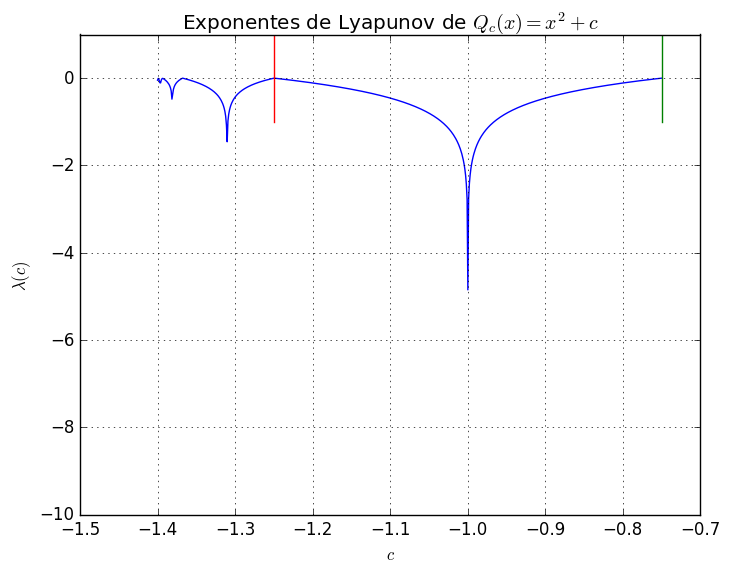

In [61]:
plot(c, func)
plot([-0.75,  -0.75], [1, -1])
plot([-1.25,  -1.25], [1, -1])
xlabel(L"c")
ylabel(L"\lambda(c)")
grid(true)
title(L"Exponentes de Lyapunov de $Q_c(x)= x^2 +c$")
ylim(-10,1.0)
show()

Ahora encontremos los valores de c para los que los exponentes se anulan:

Los valores señalados son los valores de c de las bifurcaciones ya obtenidas previamente:
$c_1=-1/4$ y $c_2=-3/4$. Y notamos que en estos valores, los exponentes de Lyapunov son cero. Por lo que se puede intuir que 
esta es la particularidad en los valores de bifurcación.

Tratemos de comprobarlo encontrando los valores de c para los cuales los exponentes se anulan.

Implementemos la siguiente función que enlista los ceros en el arreglo $evaluación$ antes definido.

In [62]:
function ceros!(valores::Array,evaluaciones::Array,resultados::Array)
    for i in 1:length(evaluaciones)
        if abs(evaluaciones[i]) < 2e-4
            push!(resultados,valores[i])
        end
    end 
    
end

ceros! (generic function with 1 method)

In [63]:
resultados=Float64[]

0-element Array{Float64,1}

In [64]:
ceros!(c,func,resultados)

In [65]:
resultados

0-element Array{Float64,1}

Notamos que solo nos da (aproximadamente) el valor de $c_1=-3/4$,  con una sensibilidad de $2e-4$, lo cual se debe
al refinamiento dado en el cálculo de los exponentes. Sin embargo, al tratar de refinar, el tiempo de cálculo comienza
a crecer muy rápido, por lo que concluimos que el método puede ser optimizado para éstos fines. Sin embargo,
al estudiar la [literarura](http://hypertextbook.com/chaos/lyapunov-1/), encontramos que nuestra deducción es correcta. 

Ahora veamos qué pasa cuando la condición inicial es un punto fijo superestable ($x_0=0.0$):

Marquemos los puntos conocidos donde hay puntos superestables $c= -1,-1.3107$ en la siguiente gráfica.

In [66]:
crange = -(0.75-1/2^16):-1/2^10:-1.405
func,c= explyap(Qc,1.0,crange,10000);

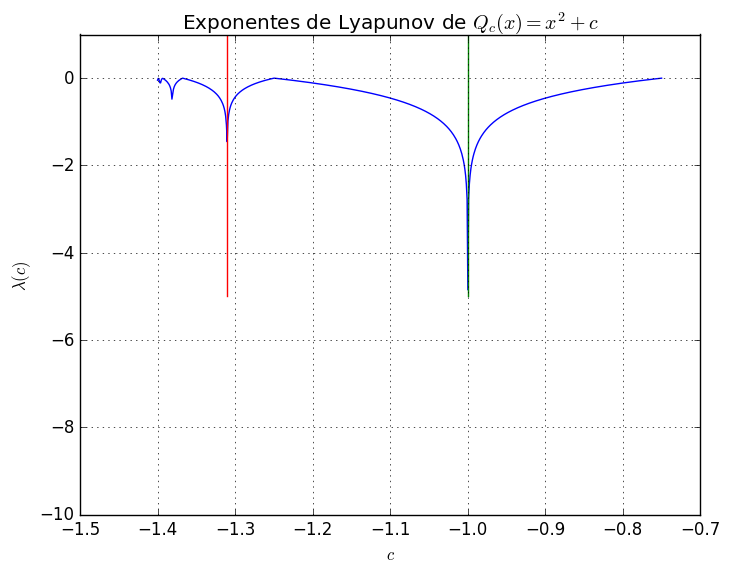

In [67]:
plot(c, func)
plot([-1,  -1], [1, -5,])
plot([-1.3107 ,  -1.3107 ], [1, -5,])
xlabel(L"c")
ylabel(L"\lambda(c)")
grid(true)
title(L"Exponentes de Lyapunov de $Q_c(x)= x^2 +c$")
ylim(-10,1.0)
show()

Observamos que en estos valores, los exponentes de Lyapunov divergen a $- \infty$. Lo que, según la definición antes mencionada, son los puntos menos caóticos (o mas estables), del sistema. Ahora entendemos su nombre.


## Ejercicio 3:
Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$.

In [68]:
Qc_p1(x,c) = x^2 + c
Qc_p1(x, args...) = !c(x, args[1])

Qc_p1 (generic function with 2 methods)

In [69]:
function Qc_n(x, args)
    c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc_p1(x,c)
    for it = 1:n
        x = Qc_p1(x,c)
    end
    return x
end

Qc_n (generic function with 1 method)

Después de generar éstos datos, intentamos graficar para los valores solicitados, sin embargo las paqueterías de 
Plots y PyPlots no logran cargarse bien en nuestros equipos, por lo que generamos las gráficas en otro y las
ponemos aquí.  

Las correspondientes a $Q_c$ estan [aquí](Qc.png), mientras que las de $Q_c ^ {2}$ [acá](Qc2.png).

Observamos que en el caso de  $Q_{c}$ todos los mapeos con puntos fijos (siempre son dos) tienen $c \leq 0.25$,
y que para $c < \approx 2$ uno de los puntos fijos sale del intervalo [-2,2], así que podemos decir que toda la dinámica 
del sistema se encuentra en el intervalo [-\approx 2, \approx 2] (en el siguiente ejercicio será evidente).


Finalmente, para los mapeos $Q_{c}^{2}$, el valor interesante es $c=-0.75$, ya que para valores mayores y menores 
se encuentran cuatro puntos fijos del mapeo, los cuales se quedan en el intervalo [-2,2] si son mayores que $-0.75$ y salen si son mayores que éste valor. Mientras que el mapeo con ese valor de $c$ sólo tiene dos puntos fijos que viven en el intervalo de interés. 

## Ejercicio 4

Estudiar la dinámica para $c=-2.2$
¿Cómo se caracteriza el valor al que tiende casi cualquier condición inicial en el intervalo $I=[-p_+,p_+]$ (donde $p_+$ es el valor positivo tal que $Q_c(p_+)=p_+$), después de muchos iterados? (El intervalo $I$ es donde "toda la dinámica interesante ocurre".)
¿Qué condición se requiere, en términos de $I$ (y de los iterados de $Q_c(x)$, para que se cumpla el inciso anterior?
Caracterizen al complemento del conjunto de los casos anteriores, es decir, cuando los iterados de la condición inicial no llegan a donde casi cualquier condición inicial termina. ¿Cómo se conoce a este conjunto?

Calculemos los puntos fijos de ésta función. 

In [71]:
using Roots

In [72]:
function quadratic{T<:Real}(a::T, b::T, c::T)
    disc = b^2 - 4*a*c #Calculamos el valor del discriminante
    @assert a != 0 "Tu ecuación no es de segundo grado, revisa los argumentos.", disc < 0 
    "La ecuación tiene soluciones complejas, no es posible resolver la ecuación."
    resuelve_cuad(a,b,c, disc)
end

function resuelve_cuad(a, b, c, disc) #El algoritmo para encontrar las raíces
    sq = sqrt(disc)
    x1 = (-b+sq)/(2a)
    x2 = (-b-sq)/(2a)
    if x1 == x2
        raices = Float64[x1]
    else
        raices = typeof(x1)[x1,x2]
    end
    return raices
end

resuelve_cuad (generic function with 1 method)

In [73]:
pfQc2=quadratic(1.0,-1.0,-2.2)

2-element Array{Float64,1}:
  2.06525
 -1.06525

Entonces $p_+ = 2.06525$

In [74]:
pmas=2.06525

2.06525

Hagamos un programa que calcule las iteraciones de una función $f$, en un rango $I$ de condiciones iniciales.

In [75]:
function iterando(x0::FloatRange, f::Function,  n = 1000)
    resultados = zeros(x0)
    for i in eachindex(x0)
        condini = x0[i]
        for k in 1:n
            condini = f(condini)
        end
        resultados[i] = condini
    end
    return resultados
end



iterando (generic function with 2 methods)

In [76]:
Qc2(x) = Qc(x, -2.2)

Qc2 (generic function with 1 method)

In [77]:
r=-pmas:1e-6:pmas

-2.06525:1.0e-6:2.06525

In [78]:
iteraciones = iterando(r, Qc2)

4130501-element Array{Float64,1}:
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
   ⋮
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf

Es decir, todas las evaluaciones se salen del intervalo [-p_+,p_+] (salvo un conjunto de medida cero),
veamos cuáles son éstos valores utilizando un programita de cursos anteriores que encuentra valores dentro de un intervalo finito dado por $xmin$ y $xmax$.

In [79]:
function valout(rango::FloatRange, f::Function, n = 10)
    mr = typeof(zeros(2))[]
    xmin, xmax = rango[1], rango[end]
    for j in eachindex(rango)
        x0 = rango[j]
        for k in 1:n
            x0 = f(x0)
            if !(xmin <= x0 <= xmax)
                push!(mr, Float64[rango[j], k])
                break
            end
        end
    end
    return mr
end

valout (generic function with 2 methods)

In [80]:
mrr = valout(r, Qc2);
xs1 = Float64[x[1] for x in mrr]
ys1 = Float64[x[2] for x in mrr];

In [81]:
#Pkg.add("PyPlot")

In [82]:
#using PyPlot

Coloreemos los valores que obtuvimos graficando el número de iteraciones contra los valores en el intervalo 
$[-p_+,p+]$ que se quedan en el mismo después de esa iteración. 

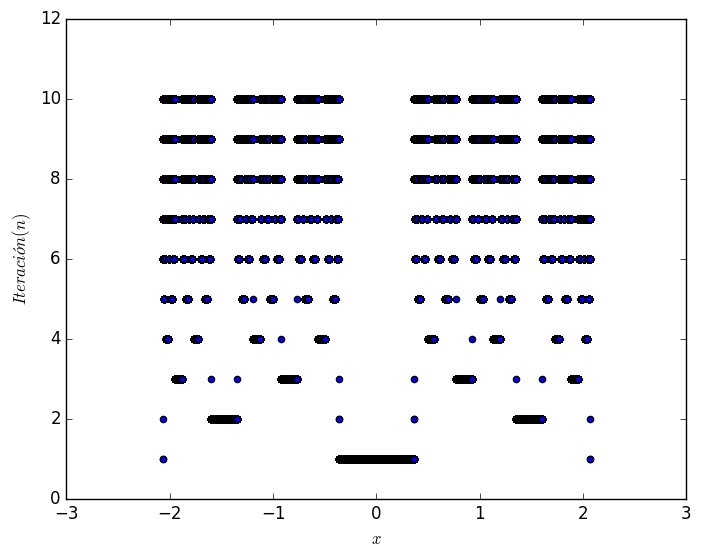

In [83]:
p = scatter(xs1,ys1)
xlabel(L"x")
ylabel(L"Iteración (n)")
ylim(0,12.0)
show()

¡Descubrimos que es el [conjunto](https://math.berkeley.edu/~sagrawal/su15_math104/lec8_cantor.pdf) de [Cantor!](https://www.youtube.com/watch?v=R6lSGzL4cuI),que es denso en ese intervalo, por lo tanto su complemento es de medida cero, y en este conjunto (el complemento de Cantor)las evaluaciones de $Q_c$ con $c=2.2$ se quedan contenidas en el mismo intervalo.